<a href="https://colab.research.google.com/github/SPSivaSuthan/Affairs-Dataset---R/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'titanic.csv', index_col='PassengerId')

In [4]:
df.head()

Survived  Pclass  ... Cabin Embarked
PassengerId                    ...               
1                   0       3  ...   NaN        S
2                   1       1  ...   C85        C
3                   1       3  ...   NaN        S
4                   1       1  ...  C123        S
5                   0       3  ...   NaN        S

[5 rows x 11 columns]

In [10]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
df = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]

We need to convert 'Sex' into an integer value of 0 or 1. Encoding!

In [15]:
df['Sex'] = df['Sex'].map({'male': 0,'female': 1})

In [16]:
df = df.dropna()

In [18]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [28]:
x 

Pclass  Sex   Age  SibSp  Parch     Fare
PassengerId                                          
1                 3    0  22.0      1      0   7.2500
2                 1    1  38.0      1      0  71.2833
3                 3    1  26.0      0      0   7.9250
4                 1    1  35.0      1      0  53.1000
5                 3    0  35.0      0      0   8.0500
...             ...  ...   ...    ...    ...      ...
886               3    1  39.0      0      5  29.1250
887               2    0  27.0      0      0  13.0000
888               1    1  19.0      0      0  30.0000
890               1    0  26.0      0      0  30.0000
891               3    0  32.0      0      0   7.7500

[714 rows x 6 columns]

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)

In [22]:
 from sklearn import tree
 model = tree.DecisionTreeClassifier()
 model.fit(x,y)
 y_predict = model.predict(x)
 from sklearn.metrics import accuracy_score
 accuracy_score(y, y_predict)

0.9859943977591037

In [26]:
dot_data = tree.export_graphviz(model, feature_names=x.columns,out_file='tree.dot',filled=True,rounded=True)

!dot -Tpng tree.dot > tree.png # image

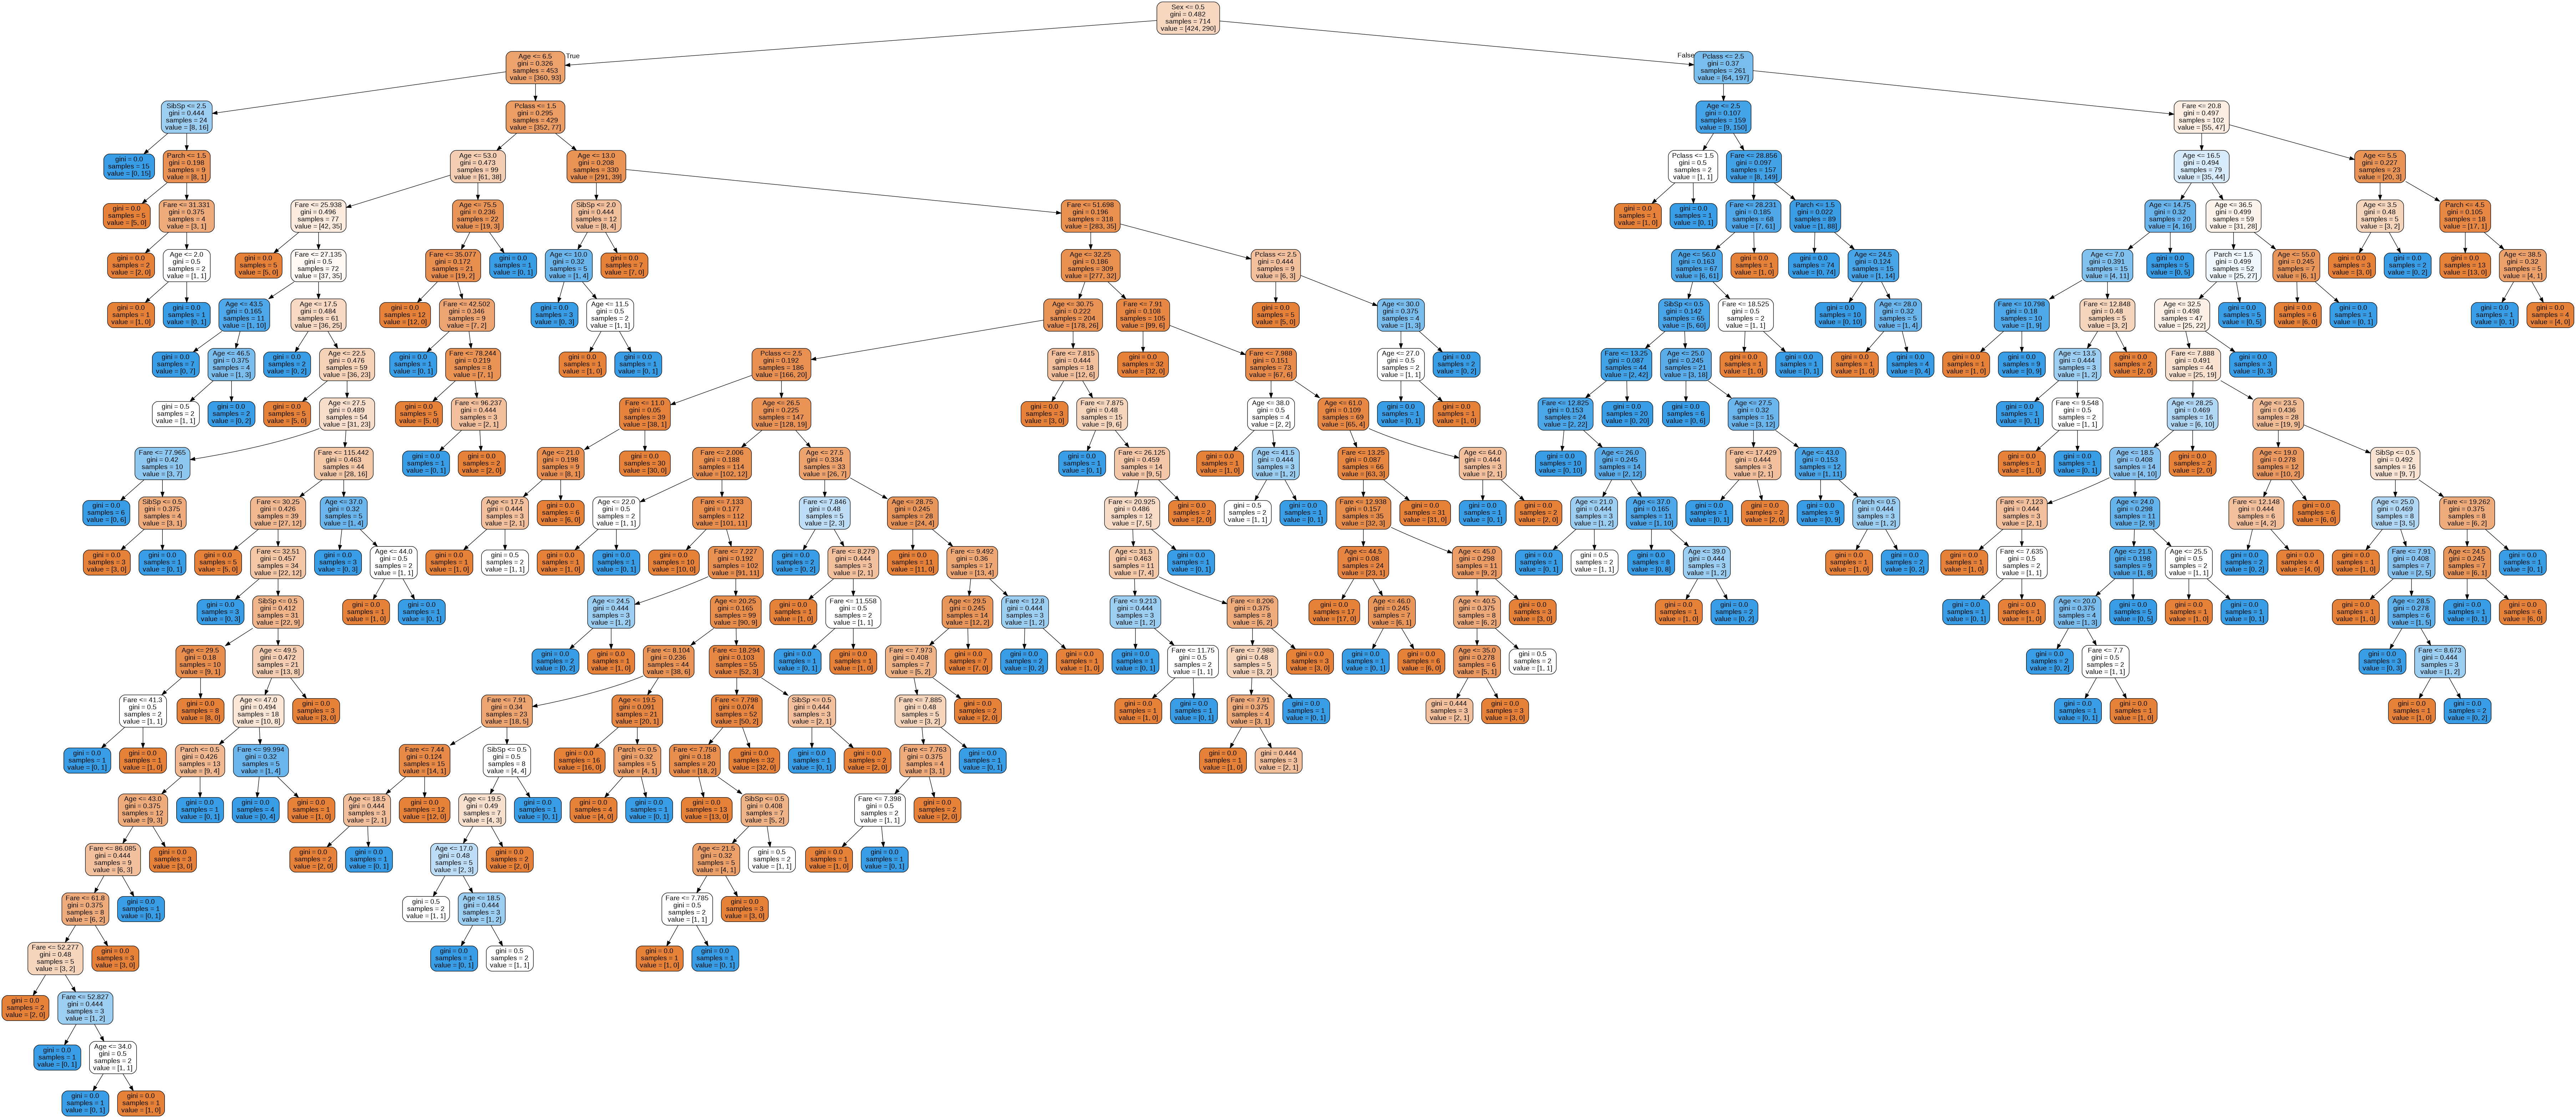

In [29]:
from IPython.display import Image
Image(filename = 'tree.png')

In [31]:
from sklearn import tree 
model = tree.DecisionTreeClassifier()


In [33]:
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8324022346368715

In [35]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_predict), columns=['Predicted Not Survived', 'Predicted Survival'], index=['True Not Survival', 'True Survival'])

Predicted Not Survived  Predicted Survival
True Not Survival                      99                  13
True Survival                          17                  50

In [40]:
dot_data = tree.export_graphviz(model, feature_names=x.columns, out_file='tree1.dot',filled=True,rounded=True)

In [41]:
#To install this package with conda run:
#conda install -c conda-forge pydotplus

In [43]:
!dot -Tpng tree1.dot > tree1.png #image


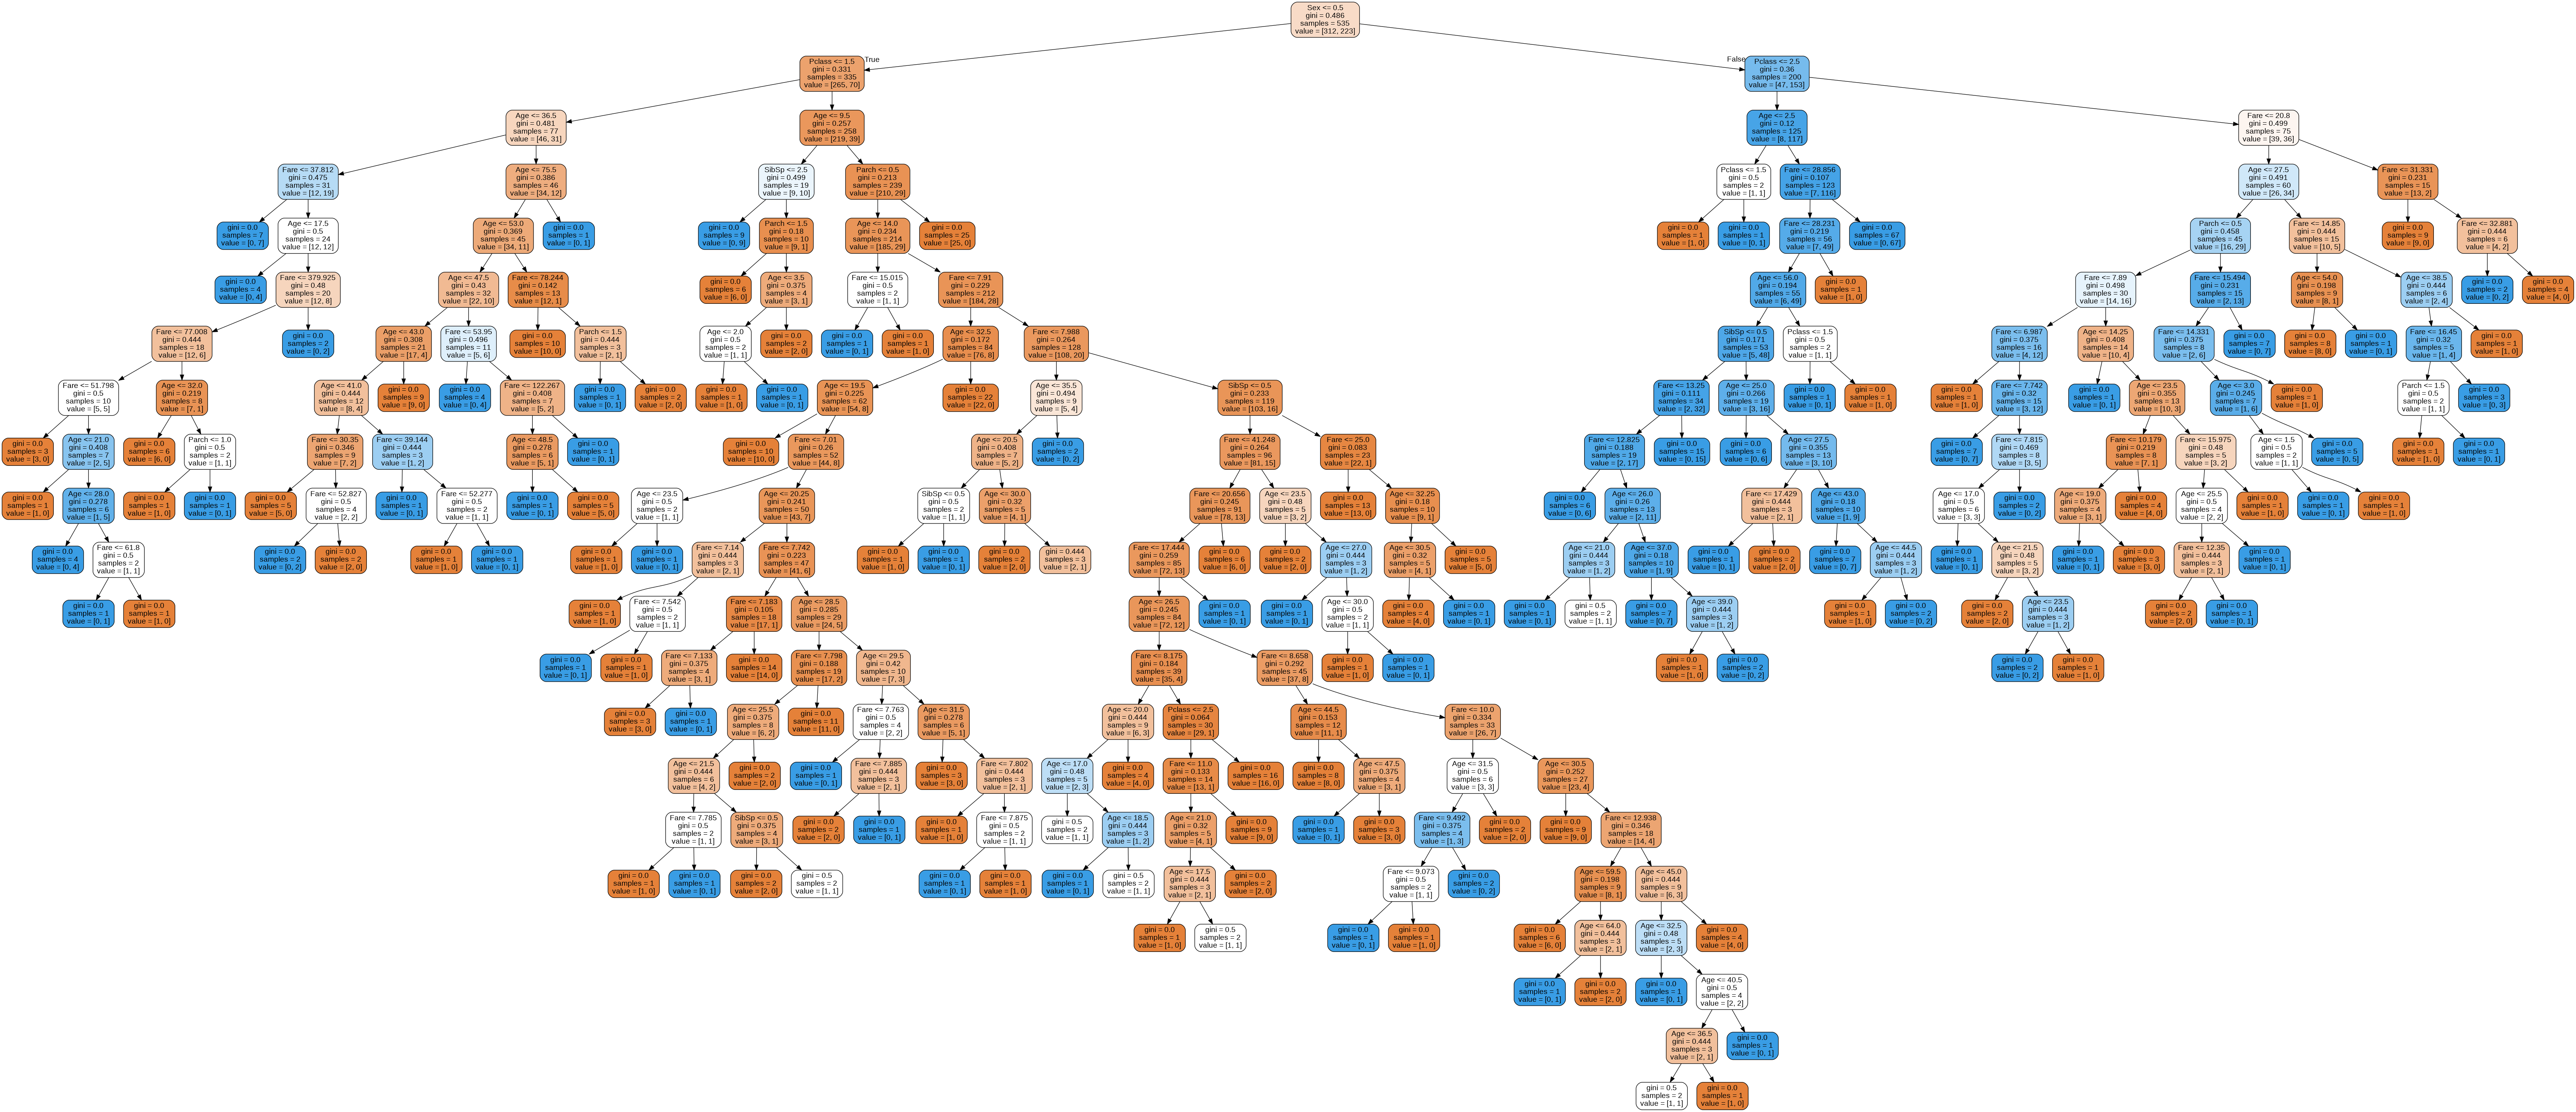

In [45]:
from IPython.display import Image
Image(filename = 'tree1.png')

Preventing Overfitting


In [47]:
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
model = tree.DecisionTreeClassifier(max_leaf_nodes = 8, min_samples_leaf= 20)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, y_predict))

0.8100558659217877


Random Forest


In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 1)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='entropy', n_estimators= 25, random_state=1)

model.fit(x_train, y_train)
y_predict = model.predict(x_test)

from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, y_predict))

0.8603351955307262


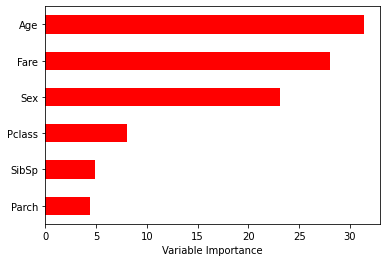

In [63]:
Importance = pd.DataFrame({'Importance':model.feature_importances_*100}, index=x_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None